<a href="https://colab.research.google.com/github/Mostafazayd97/pytorch-projects/blob/main/moore's%20law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:
data = pd.read_csv('moore.csv').values
X  = data[:,0].reshape(-1,1)
Y = data[:,1].reshape(-1,1)


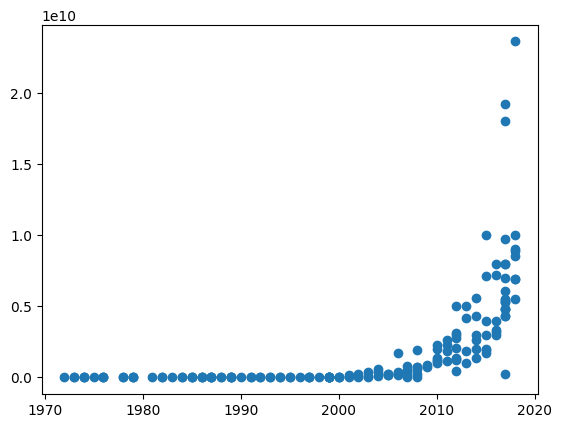

In [28]:
plt.scatter(X,Y)

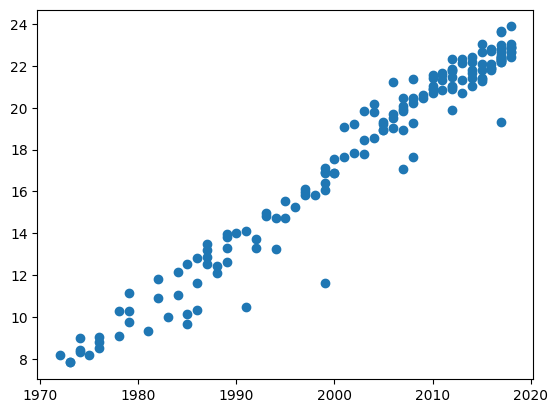

In [29]:
Y = np.log(Y)
plt.scatter(X,Y)


In [31]:
mx = np.mean(X)
my = np.mean(Y)
sx = np.std(X)
sy = np.std(Y)

In [33]:
X = (X - mx) / sx
Y = (Y - my) / sy

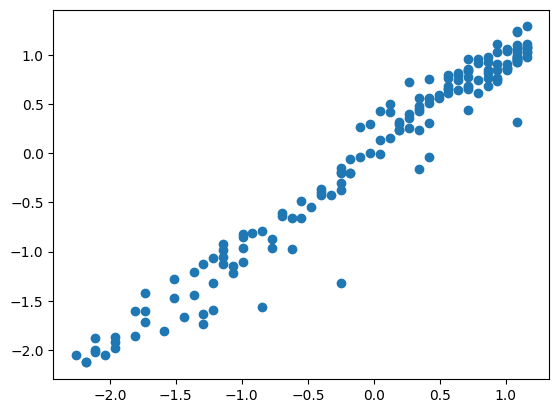

In [36]:
plt.scatter(X,Y)

In [38]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

model = nn.Linear(1,1)

In [39]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0.7)



In [41]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)


In [42]:
n_epochs = 100
losses = []
for it in range(n_epochs):
  optimizer.zero_grad()
  outputs = model(inputs)
  loss = criterion(outputs,targets)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()
  print('epoch {}, loss {}'.format(it,loss.item()))

epoch 0, loss 0.8851177096366882
epoch 1, loss 0.8516294360160828
epoch 2, loss 0.7968922257423401
epoch 3, loss 0.730470597743988
epoch 4, loss 0.6593331098556519
epoch 5, loss 0.5882571339607239
epoch 6, loss 0.5203105807304382
epoch 7, loss 0.45729658007621765
epoch 8, loss 0.4001236855983734
epoch 9, loss 0.3490927219390869
epoch 10, loss 0.3041115701198578
epoch 11, loss 0.26484882831573486
epoch 12, loss 0.23084162175655365
epoch 13, loss 0.20156808197498322
epoch 14, loss 0.17649458348751068
epoch 15, loss 0.15510523319244385
epoch 16, loss 0.13691890239715576
epoch 17, loss 0.12149770557880402
epoch 18, loss 0.1084502711892128
epoch 19, loss 0.097431480884552
epoch 20, loss 0.08814003318548203
epoch 21, loss 0.08031497895717621
epoch 22, loss 0.07373177260160446
epoch 23, loss 0.06819810718297958
epoch 24, loss 0.06355004012584686
epoch 25, loss 0.05964816361665726
epoch 26, loss 0.05637433007359505
epoch 27, loss 0.053628601133823395
epoch 28, loss 0.051326580345630646
epoch 2

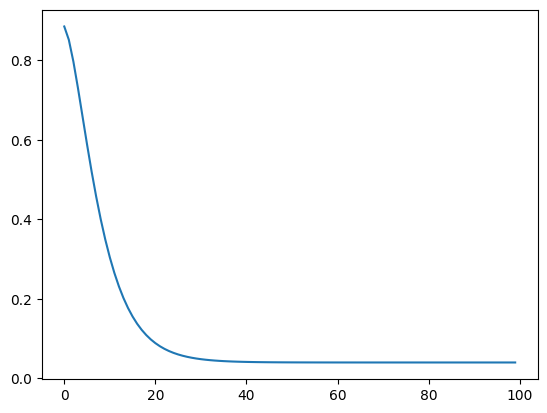

In [44]:
plt.plot(losses)

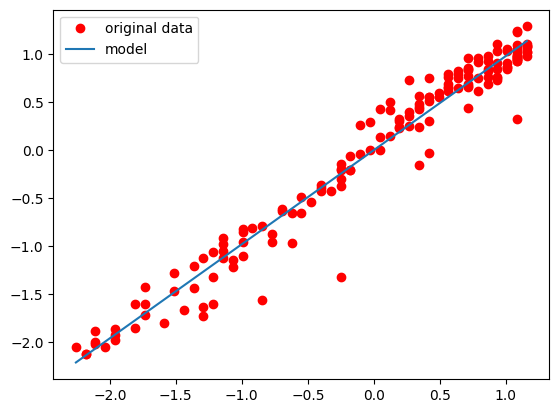

In [63]:
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X,Y,'ro',label="original data")
plt.plot  (X,predicted,label= 'model')
plt.legend()
plt.show()

In [64]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()


[[0.9799632]] [-0.00014143]


In [68]:
a = w[0,0] * sy / sx
print(a)

0.3423268928103269


In [69]:
print(f"time to double: ", np.log(2) / a)

time to double:  2.0248107733212692
